# Casos de test generados aleatoriamente

In [ ]:
import random

In [ ]:
random.seed(2020)

In [ ]:
ns = list(range(1,31,1))

In [ ]:
resistencias = [1, 10, 20, 50, 75, 100]

In [ ]:
def crear_test(n):
    pares = list()
    for i in range(n):
        w, r = random.randint(1, 30), random.randint(1, 50)
        pares.append([w, r])
    return pares

In [ ]:
with open('tests_tp1.txt', 'a') as file:
    file.write("{} {}\n".format(n, r))
    for r in resistencias:
        for n in ns:
            file.write("{} {}\n".format(n, r))
            for p in crear_test(n):
                file.write("{} {}\n".format(p[0], p[1]))
            file.write("\n")

## Analisis

In [7]:
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
results_fb = pd.read_csv('results_fb.txt', delimiter=' ', header=None)
results_fb = results_fb.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_fb['esperado'] = 2 ** results_fb['n'] * 20

In [9]:
results_btf = pd.read_csv('results_btf.txt', delimiter=' ', header=None)
results_btf = results_btf.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_btf['esperado'] = 2 ** results_btf['n'] * 0.0020

In [10]:
results_bto = pd.read_csv('results_bto.txt', delimiter=' ', header=None)
results_bto = results_bto.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_bto['esperado'] = 2 ** results_bto['n'] * 0.00006

In [18]:
results_pd = pd.read_csv('results_dp.txt', delimiter=' ', header=None)
results_pd = results_pd.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_pd['esperado'] = results_pd['n'] * results_pd['r'] * 40

In [29]:
res = pd.DataFrame([results_fb.res.tolist(), results_btf.res.tolist(), results_bto.res.tolist(), results_pd.res.tolist()]).transpose()

In [32]:
res = res.rename(columns={0:"FB",1:"BTF",2:"BTO",3:"PD"})

In [43]:
res['CORRECT_FB'] = True
res['CORRECT_BTF'] = res['BTF'] == res['FB']
res['CORRECT_BTO'] = res['BTO'] == res['FB']
res['CORRECT_PD'] = res['PD'] == res['FB']

In [ ]:
r

In [48]:
res[21:40]

,FB,BTF,BTO,PD,CORRECT_BTF,CORRECT_BTO,CORRECT_PD,CORRECT_FB
21,1,1,1,1,True,True,True,True
22,0,0,0,0,True,True,True,True
23,1,1,1,1,True,True,True,True
24,0,0,0,0,True,True,True,True
25,1,1,1,1,True,True,True,True
26,0,0,0,0,True,True,True,True
27,1,1,1,1,True,True,True,True
28,0,0,0,0,True,True,True,True
29,0,0,0,0,True,True,True,True
30,1,1,0,1,True,False,True,True


In [45]:
pd.DataFrame(res[['CORRECT_FB','CORRECT_BTF','CORRECT_BTO','CORRECT_PD']].sum())

,0
CORRECT_FB,180
CORRECT_BTF,180
CORRECT_BTO,55
CORRECT_PD,115


## Graficos y demas
### FB

In [ ]:
y = results_fb.loc[results_fb.r==100].t.tolist()
x = results_fb.loc[results_fb.r==100].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_fb, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Fuerza Bruta", xlabel='n', ylabel='tiempo (ns)')

## BTF

[Text(0, 0.5, 'tiempo (ns)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

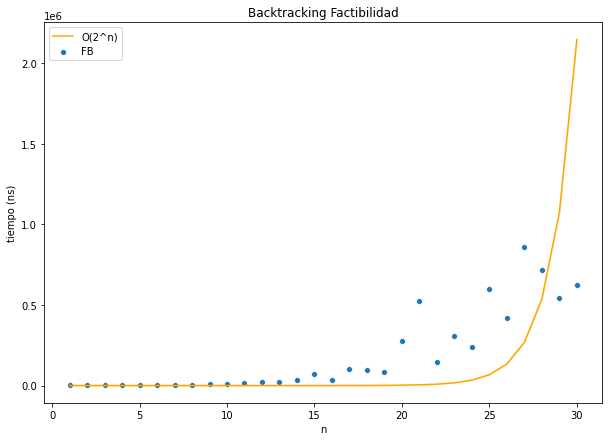

In [73]:
y = results_btf.loc[results_btf.r==100].t.tolist()
x = results_btf.loc[results_btf.r==100].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ns)')

### BTO

[Text(0, 0.5, 'tiempo (ns)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

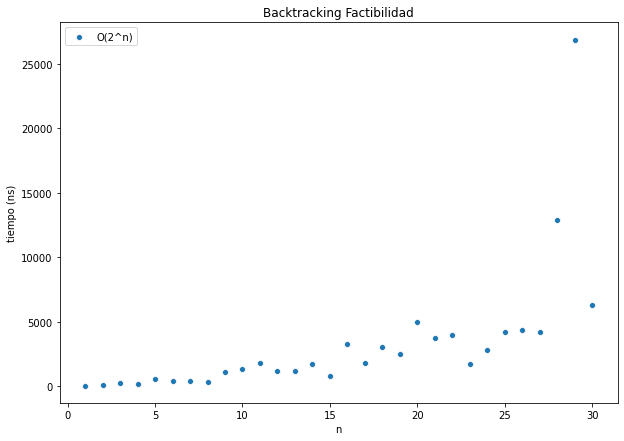

In [100]:
y = results_bto.loc[results_bto.r==10].t.tolist()
x = results_bto.loc[results_bto.r==10].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ns)')

y = results_bto.loc[results_bto.r==100].t.tolist()
x = results_bto.loc[results_bto.r==100].n.tolist()
sns.scatterplot(x, y)
plt.title("Backtracking podas por optimalidad")
plt.xlabel("n")
plt.ylabel("tiempo (nanosegundos)")
plt.show()

### PD

[Text(0, 0.5, 'tiempo (ns)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Programacion dinamica')]

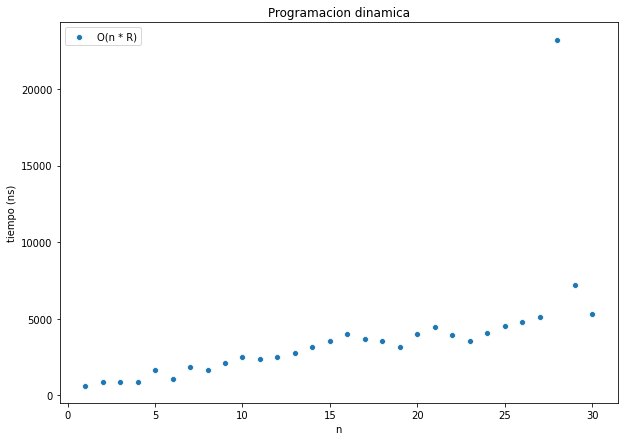

In [21]:
y = results_pd.loc[results_pd.r==10].t.tolist()
x = results_pd.loc[results_pd.r==10].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(n * R)','FB'])
fig_fb.set(title="Programacion dinamica", xlabel='n', ylabel='tiempo (ns)')